# Segmenting Honeycomb Cells

In [24]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.morphology import disk
import numpy as np

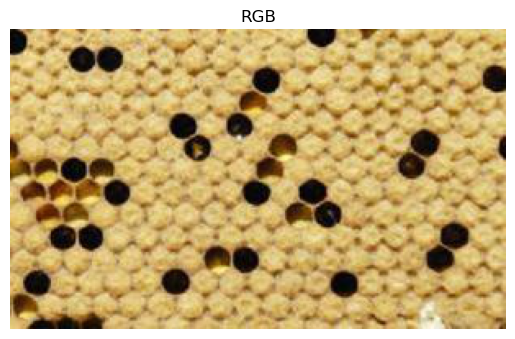

In [25]:
honeycomb = cv2.imread("./images/honeycomb.jpg")
honeycomb = cv2.cvtColor(honeycomb, cv2.COLOR_BGR2RGB)

plt.imshow(honeycomb)
plt.title('RGB')
plt.axis('off')
plt.show()

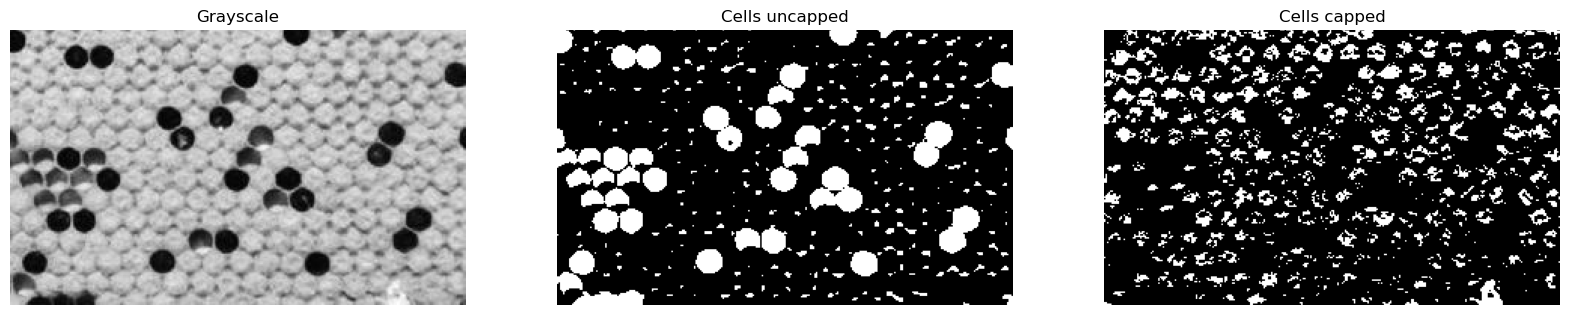

In [26]:
honeycomb_gray = cv2.cvtColor(honeycomb, cv2.COLOR_RGB2GRAY)
uncapped = honeycomb_gray < 125
capped = honeycomb_gray > 200

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(honeycomb_gray, cmap='gray')
axs[0].set_title('Grayscale')
axs[0].axis('off')
axs[1].imshow(uncapped, cmap='gray')
axs[1].set_title('Cells uncapped')
axs[1].axis('off')
axs[2].imshow(capped, cmap='gray')
axs[2].set_title('Cells capped')
axs[2].axis('off')
plt.show()

To get a segmentation of all the cells excluding the walls, we need to segment the capped and uncapped cells separately. An initial threshold of the two types of cells shows that the uncapped cells need less cleaning than the capped cells, which are closer in intensity to the cell walls.

Remove small objects from binary image.

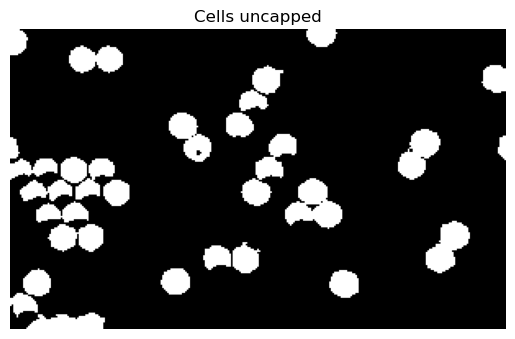

In [27]:
uncapped = morphology.remove_small_objects(uncapped, 50)

plt.imshow(uncapped, cmap='gray')
plt.title('Cells uncapped')
plt.axis('off')
plt.show()

Morphologically open image.

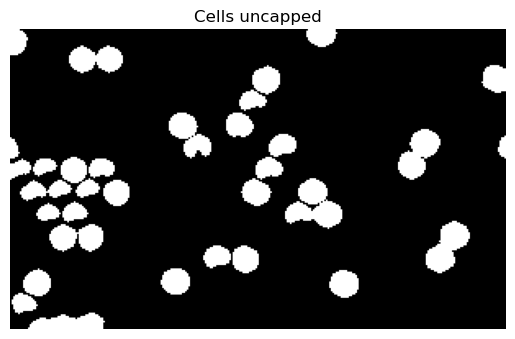

In [28]:
structuring_element = disk(3)
uncapped = cv2.morphologyEx(uncapped.astype(np.uint8), cv2.MORPH_OPEN, structuring_element)

plt.imshow(uncapped, cmap='gray')
plt.title('Cells uncapped')
plt.axis('off')
plt.show()